In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('dataset.csv')

In [2]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Country and Happiness Rank have a unique value for every index so there is no relationship between Happiness Score and their features

In [4]:
df=pd.concat([df,pd.get_dummies(df.Region, drop_first=False)],axis=1)

In [5]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977,0.012658,0.183544,0.037975,0.139241,0.126582,0.012658,0.056962,0.044304,0.253165,0.132911
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550,0.112150,0.388343,0.191743,0.347298,0.333562,0.112150,0.232507,0.206423,0.436207,0.340558
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


***Normalization***

In [6]:
import scipy.stats as stat
import pylab 

In [7]:
def plt_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    plt.hist(df[feature])
    plt.xlabel(feature)
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.xlabel(feature)
    plt.show()

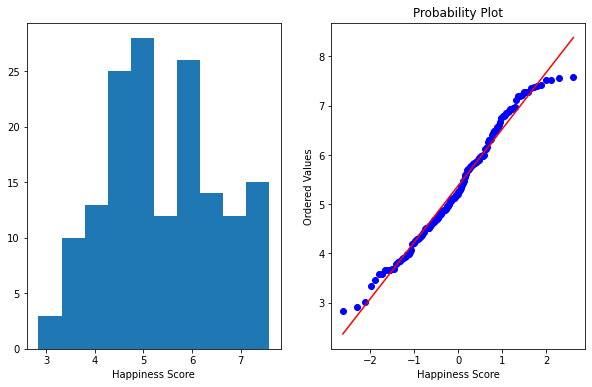

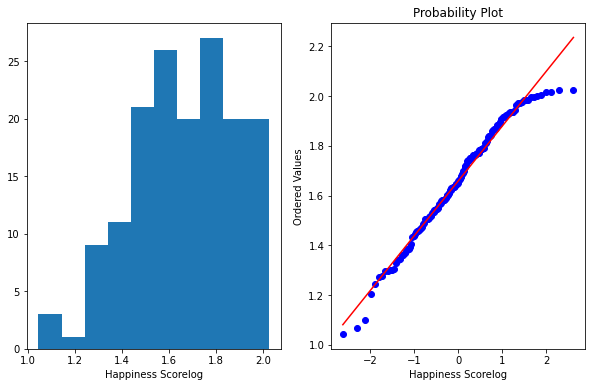

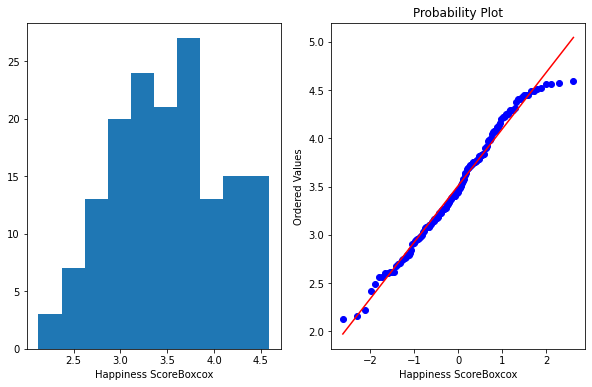

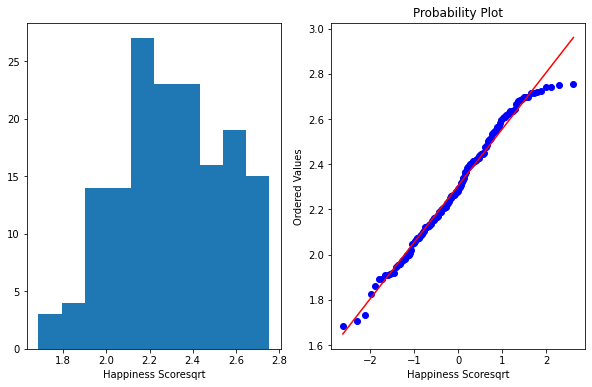

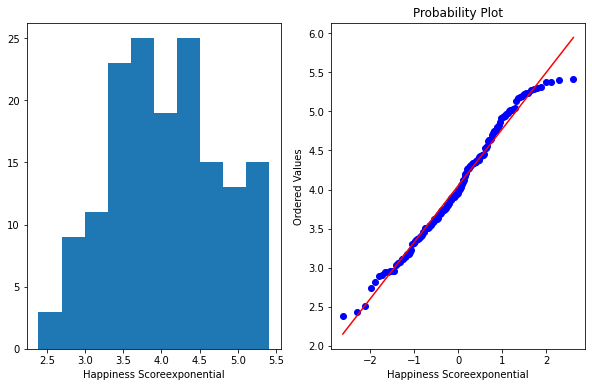

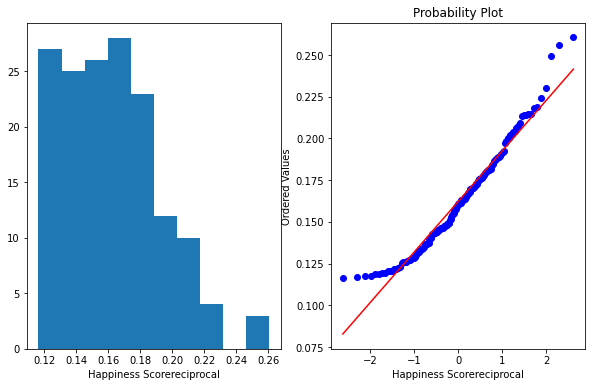

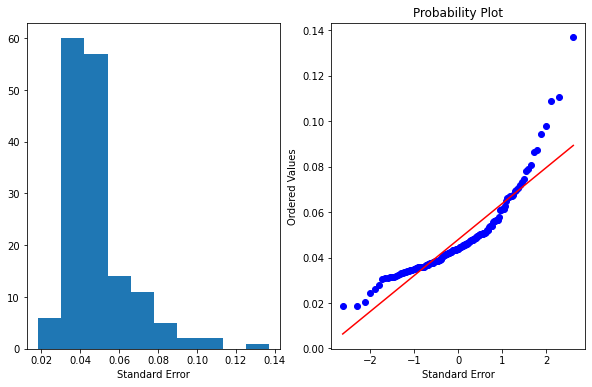

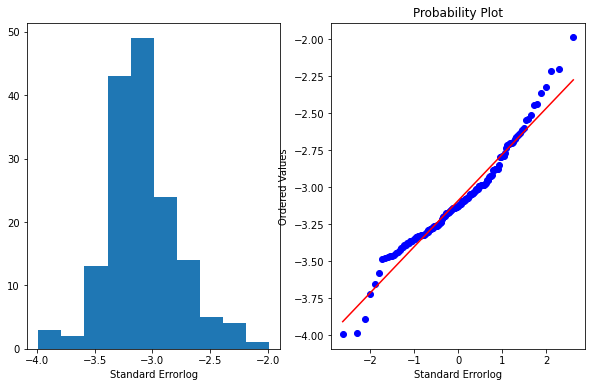

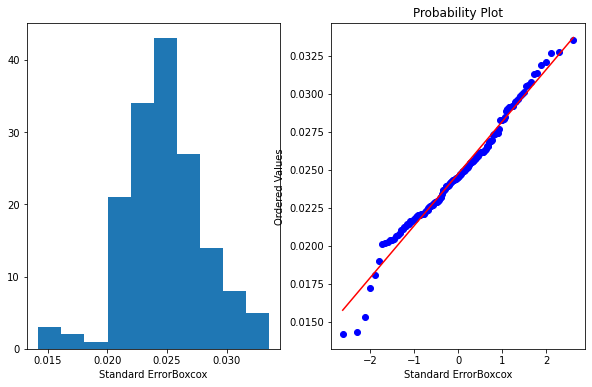

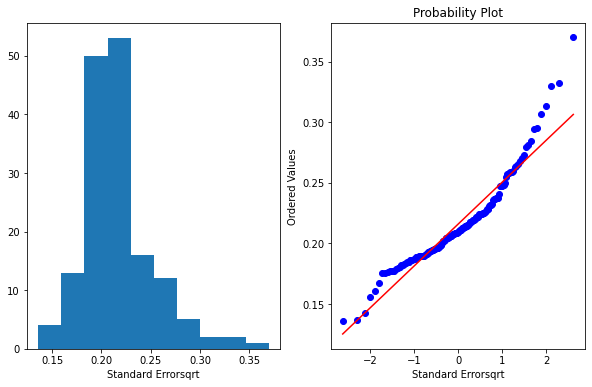

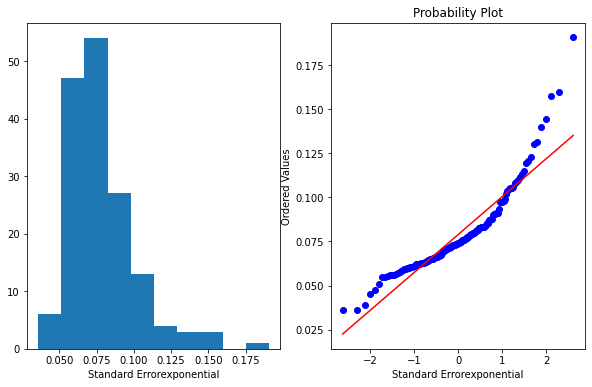

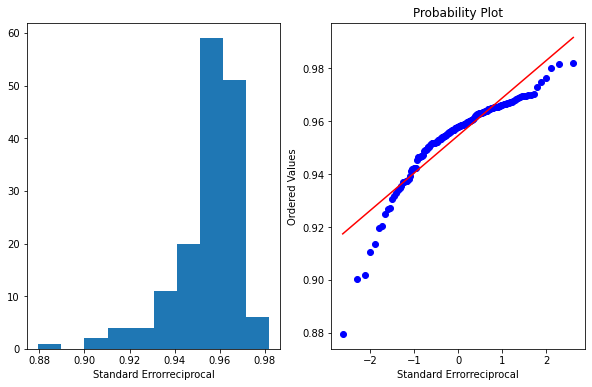

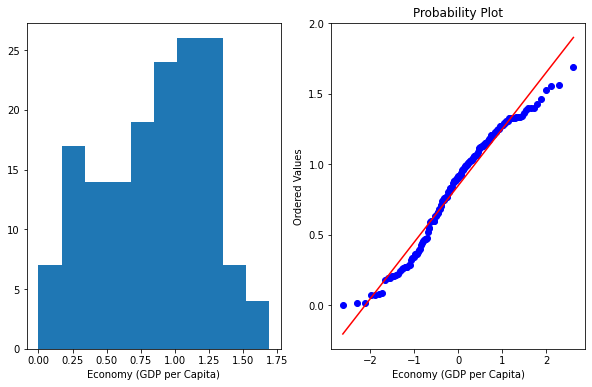

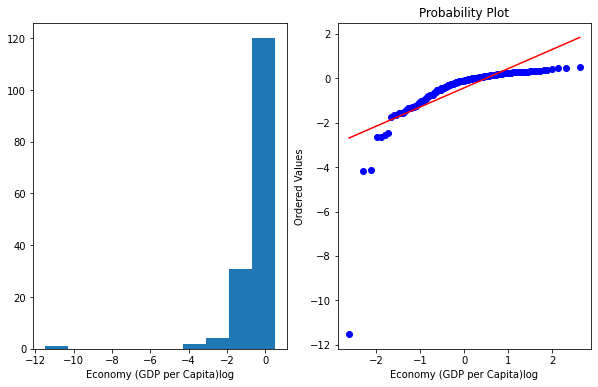

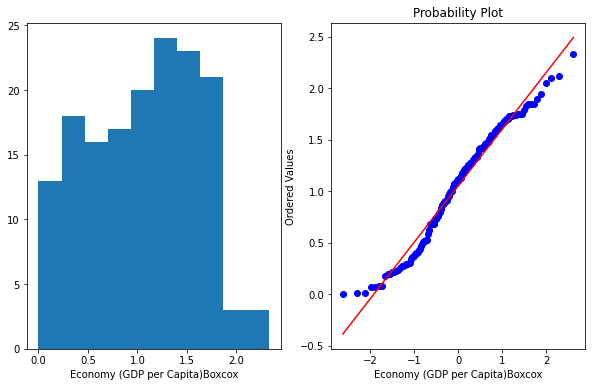

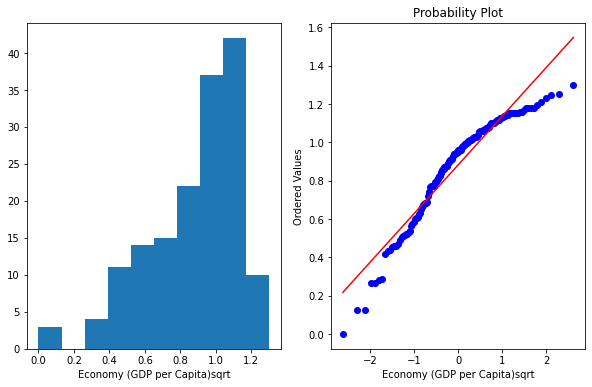

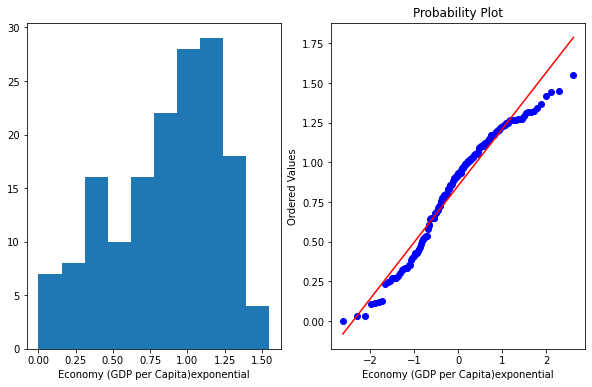

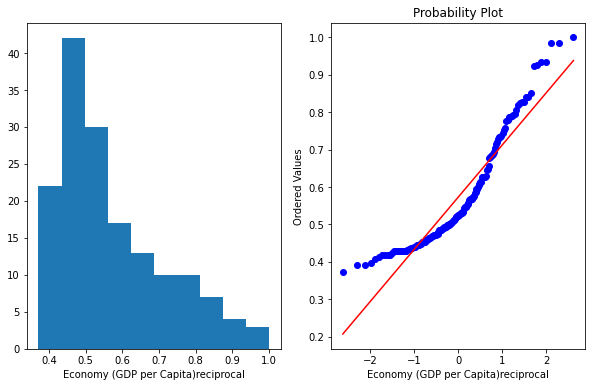

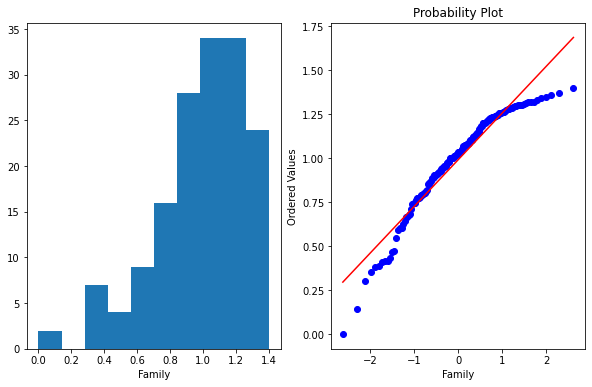

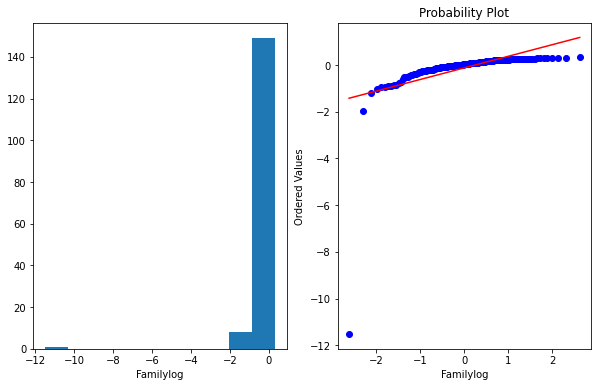

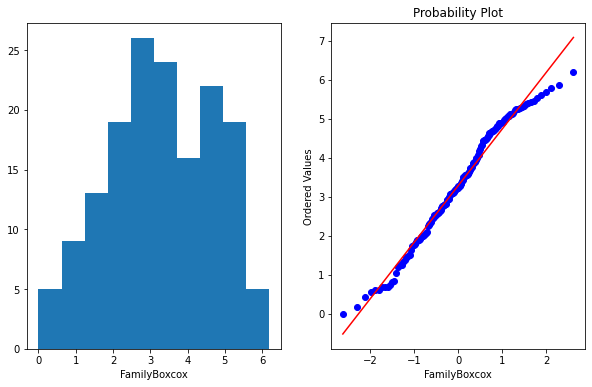

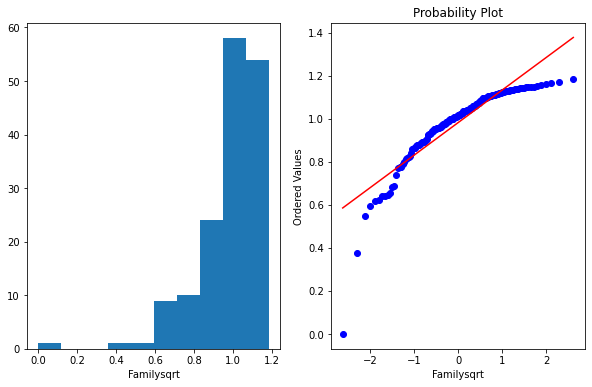

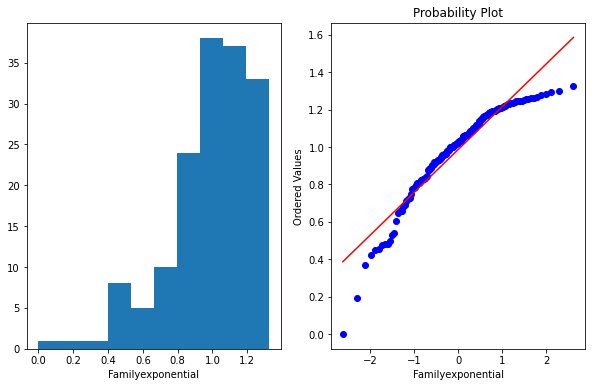

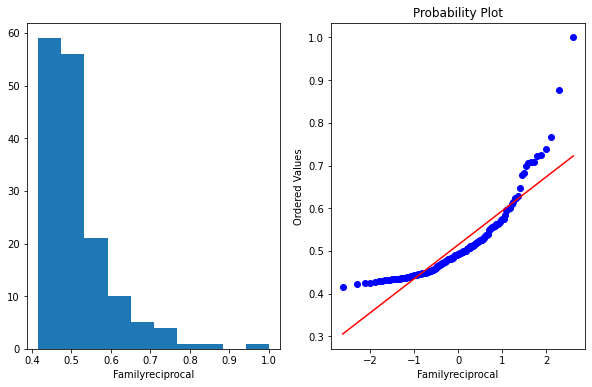

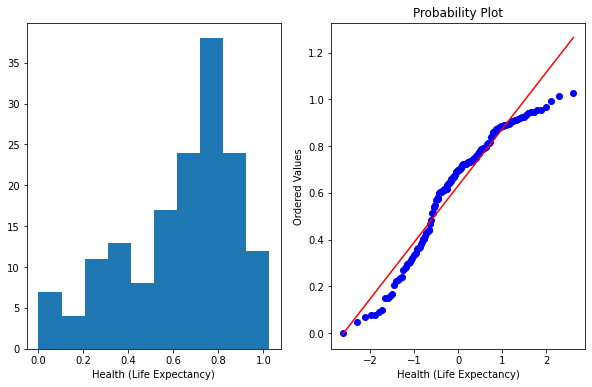

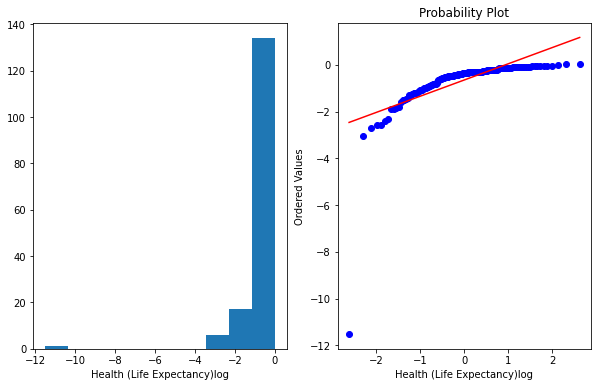

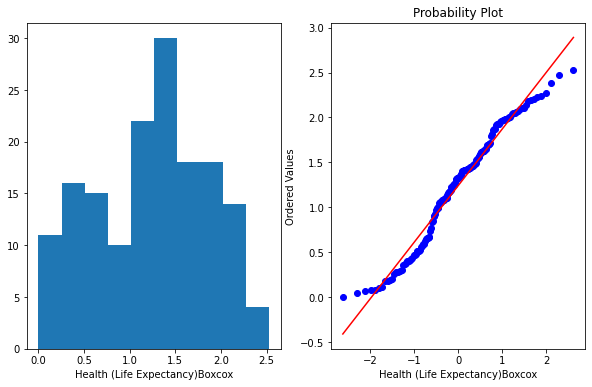

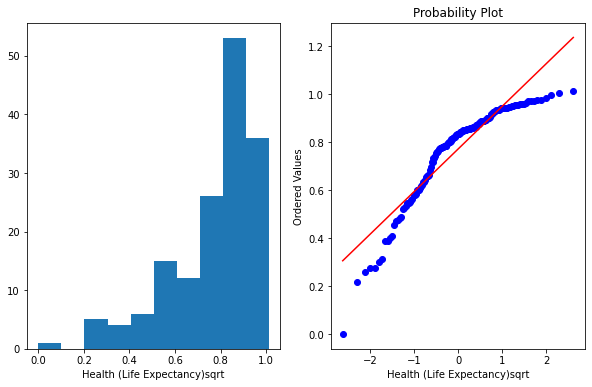

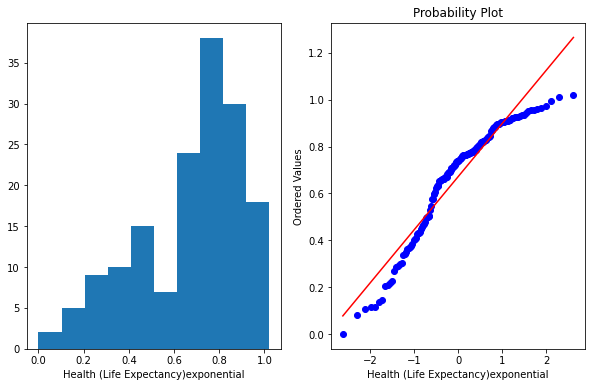

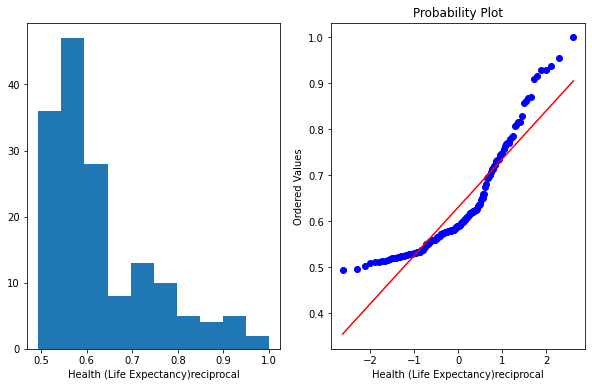

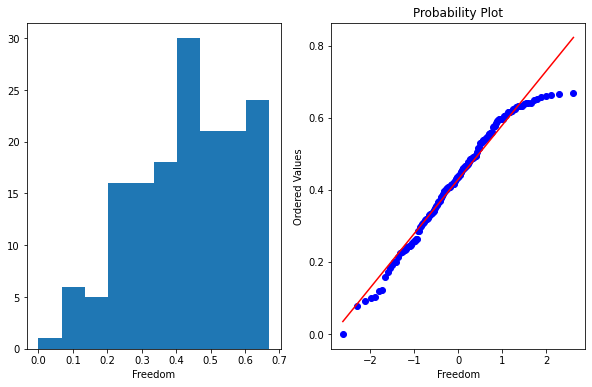

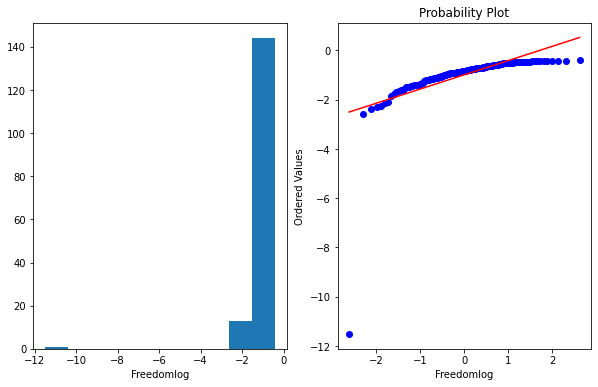

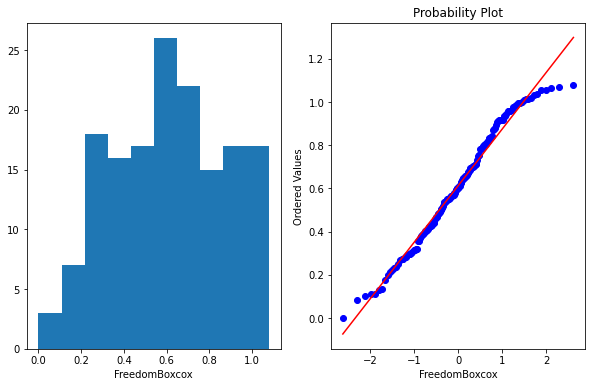

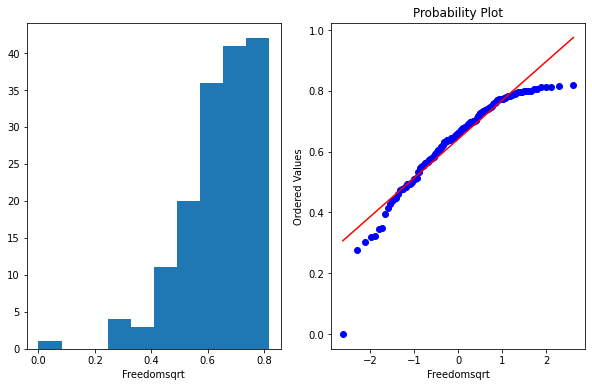

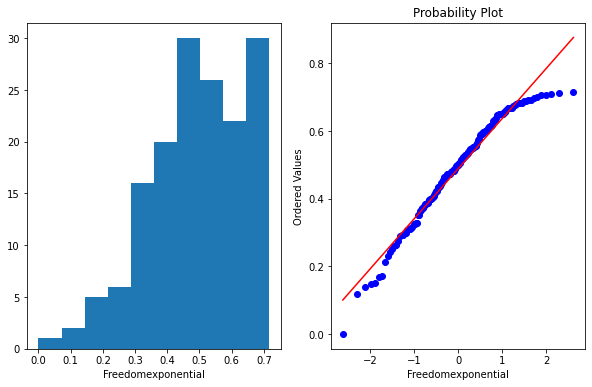

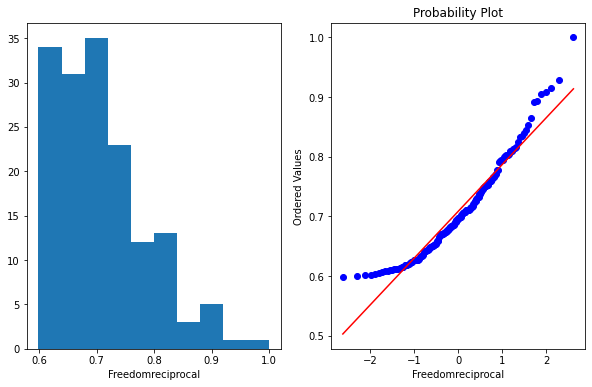

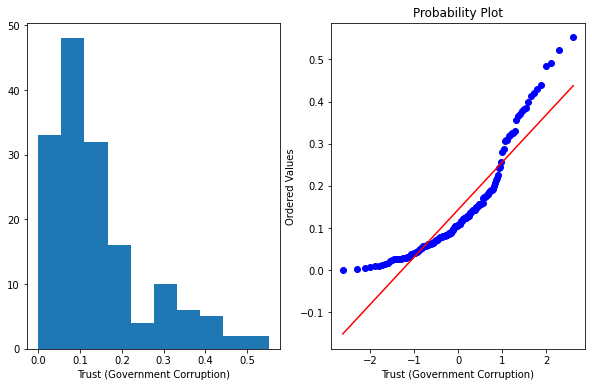

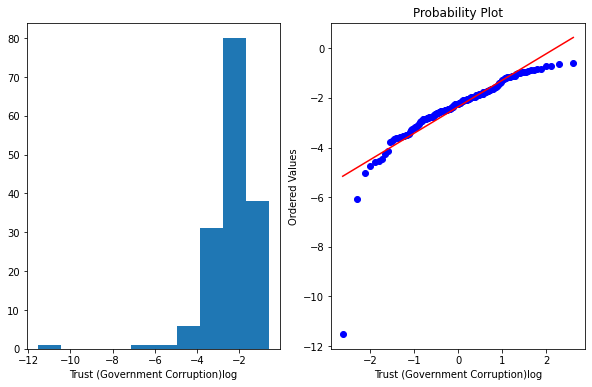

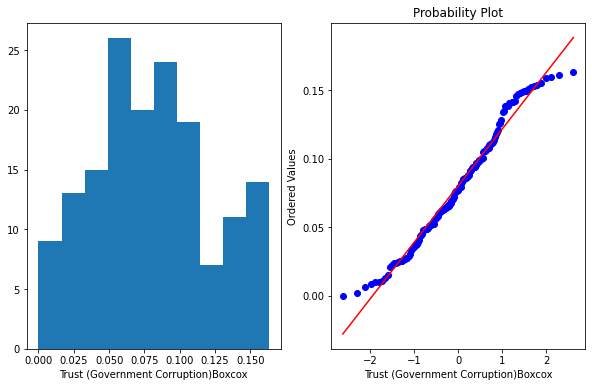

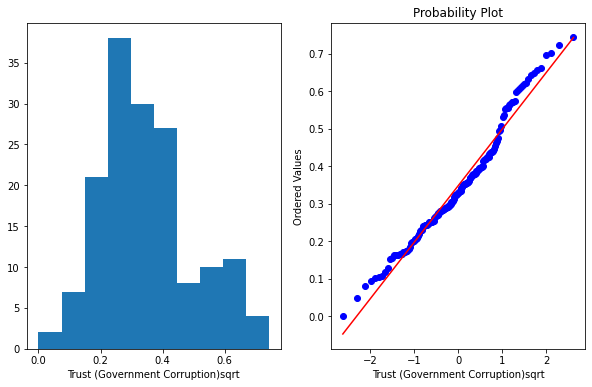

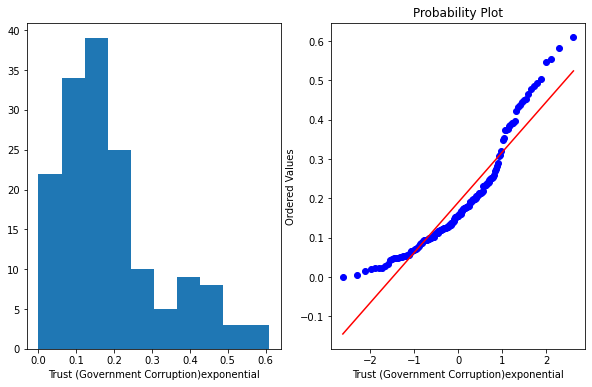

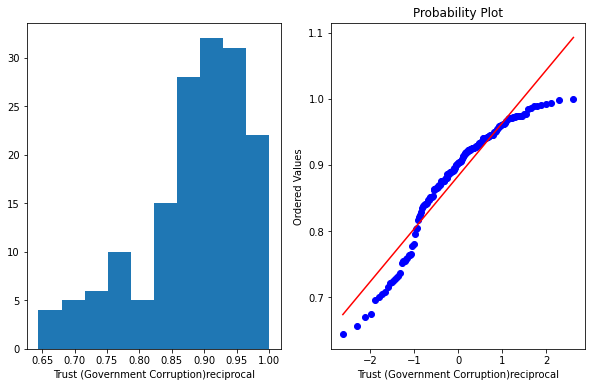

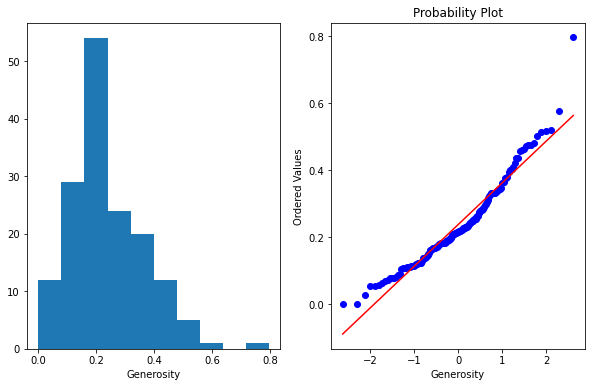

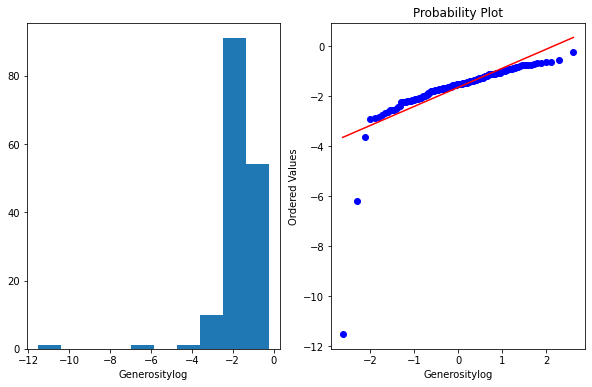

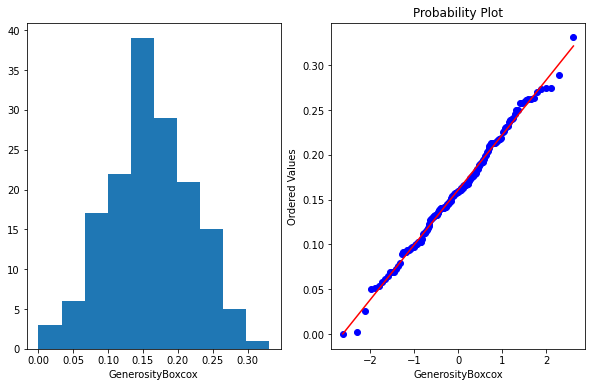

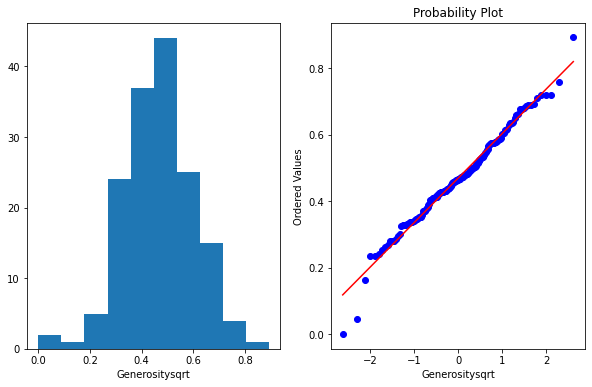

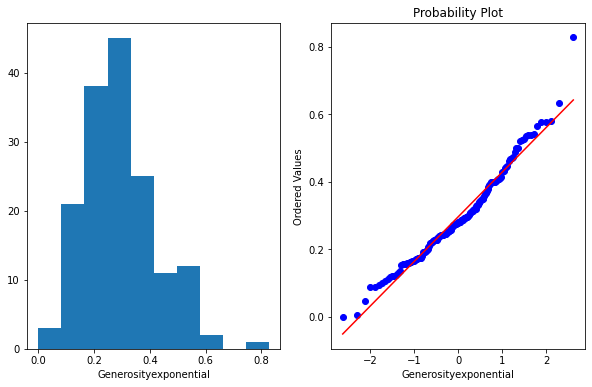

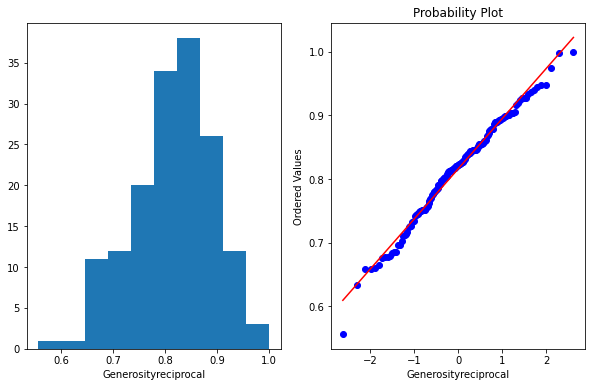

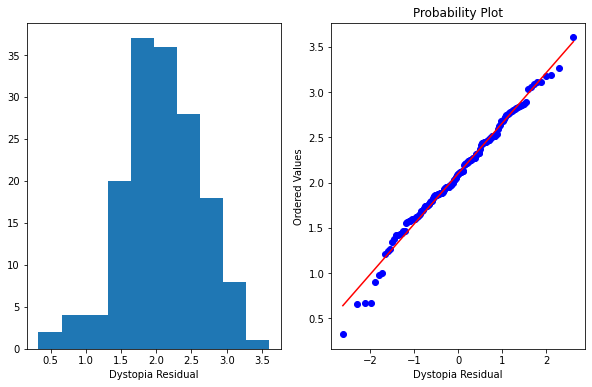

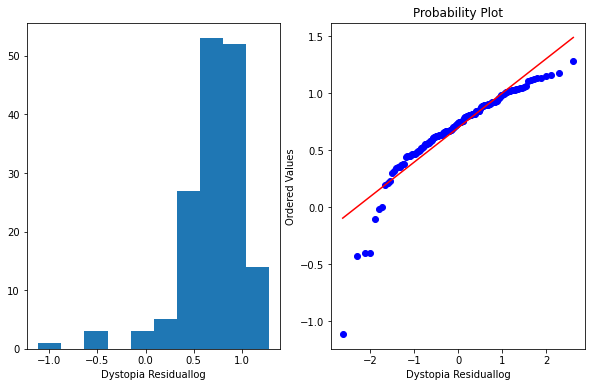

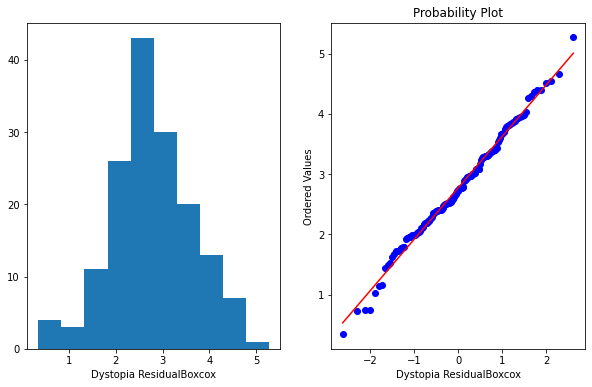

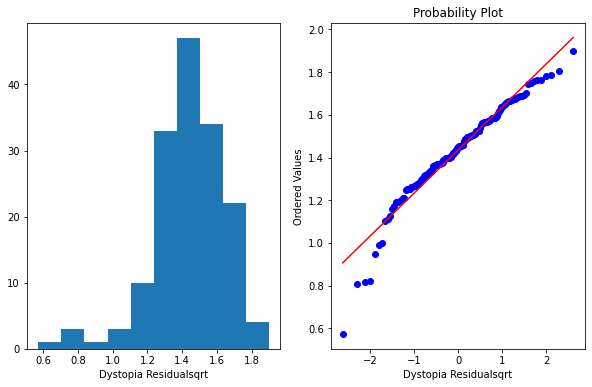

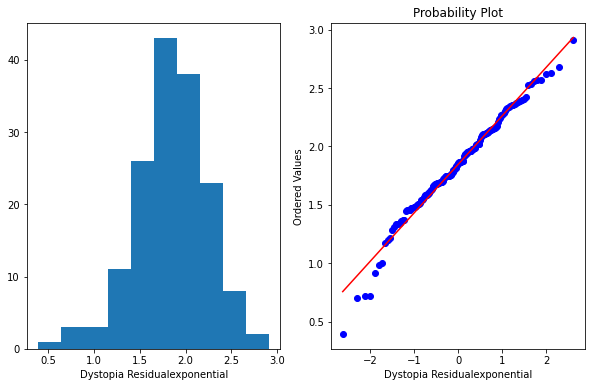

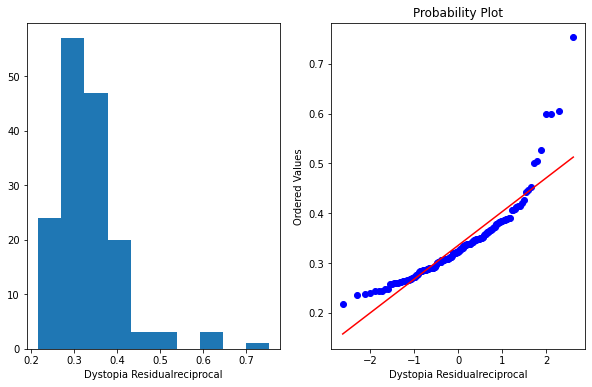

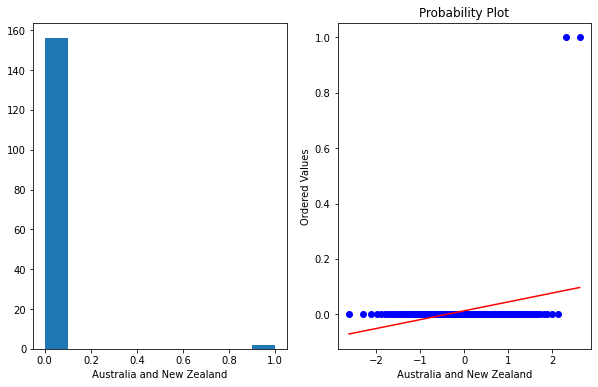

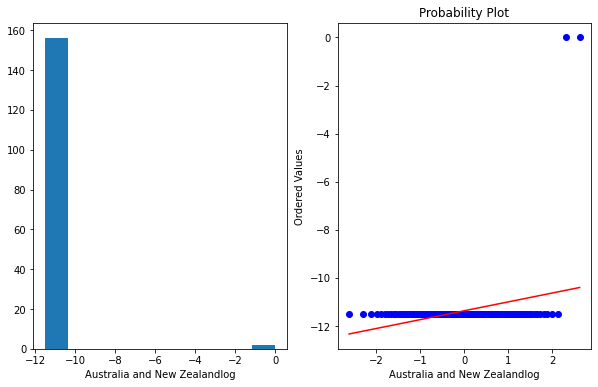

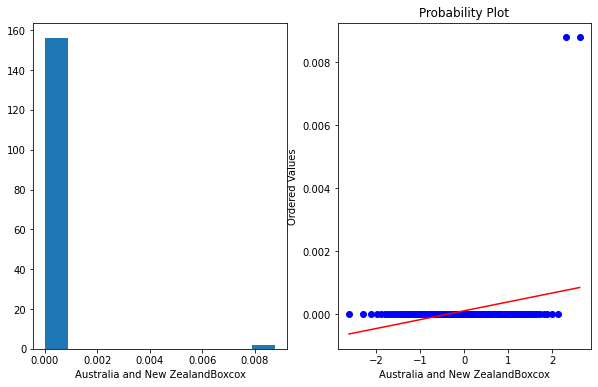

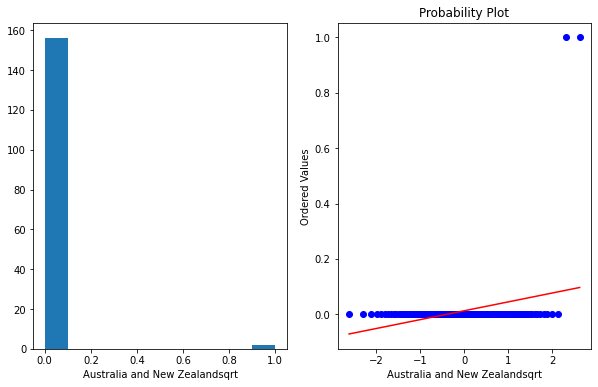

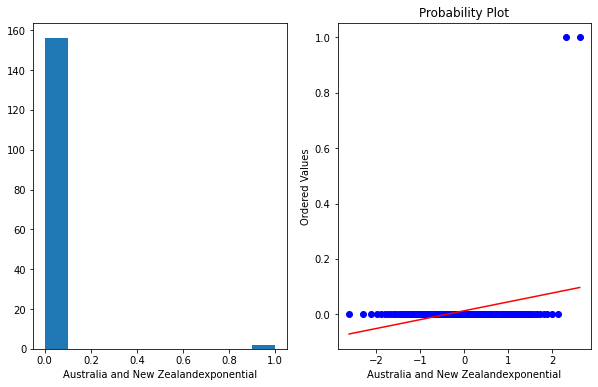

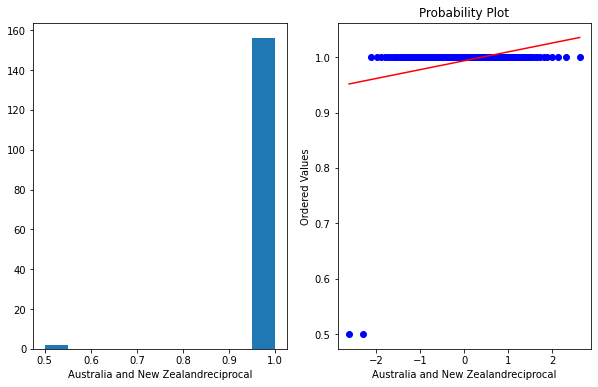

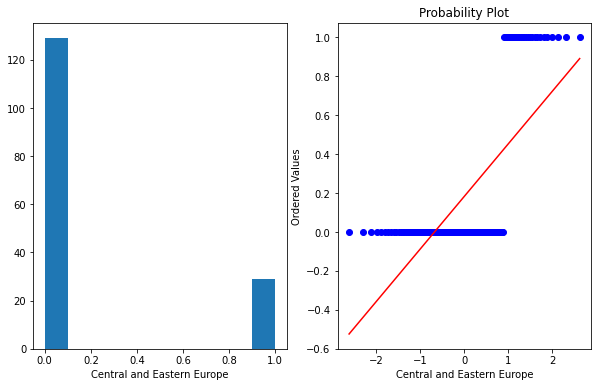

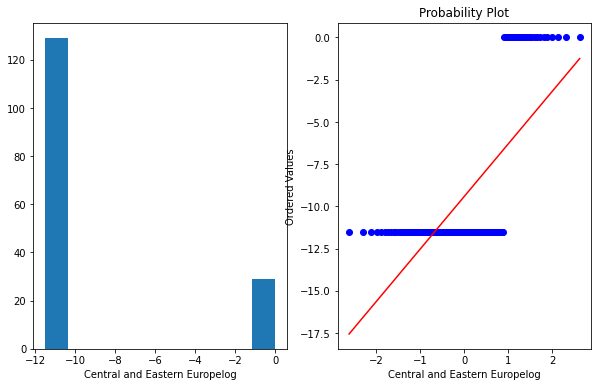

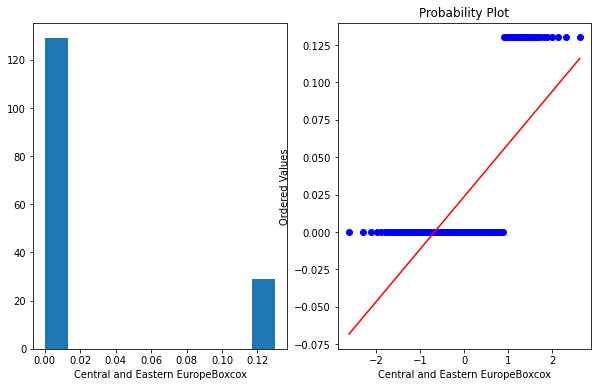

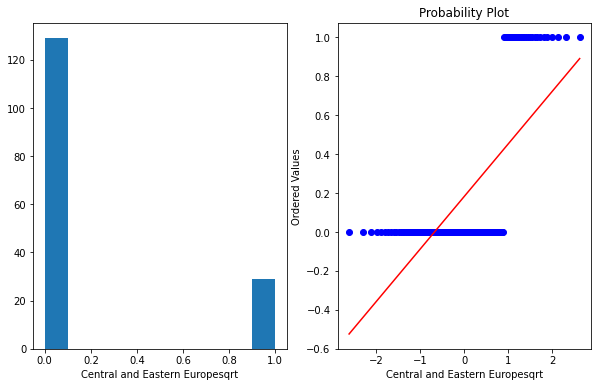

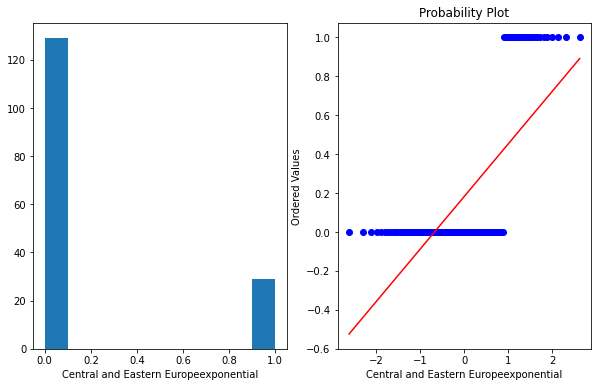

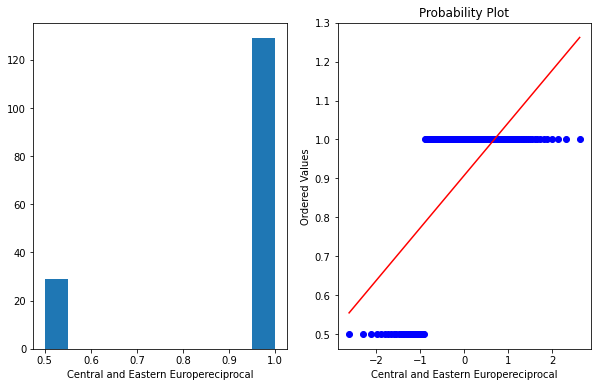

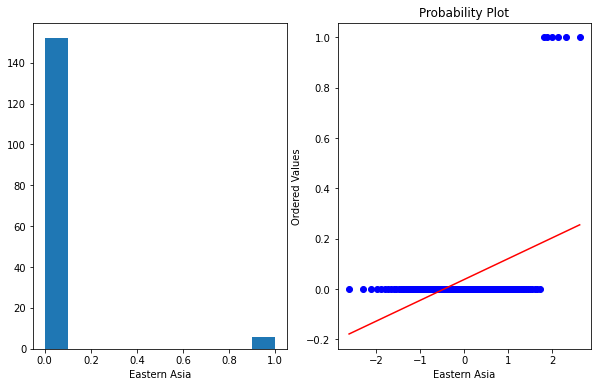

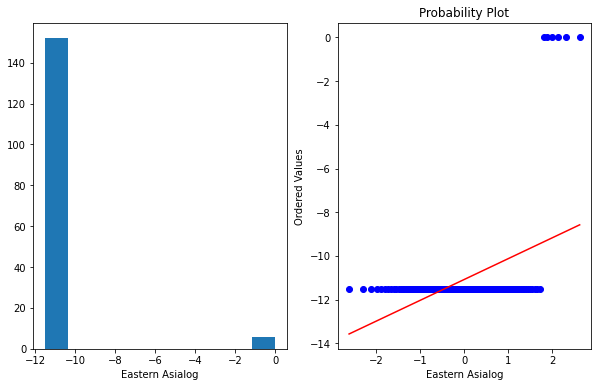

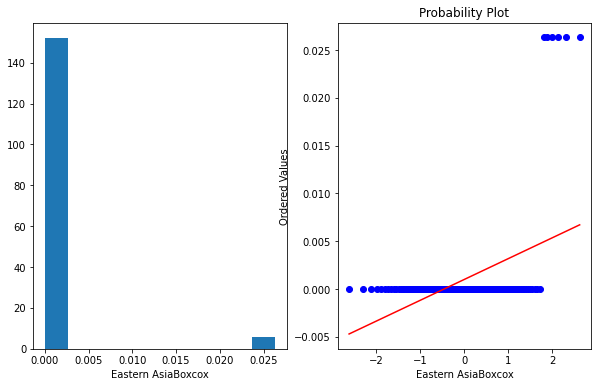

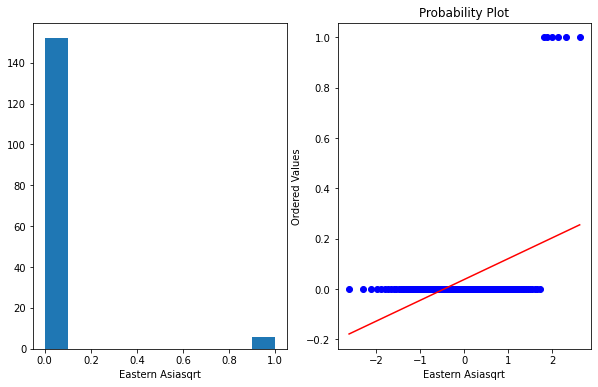

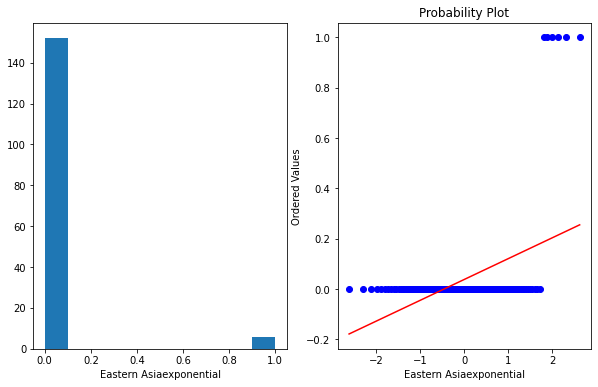

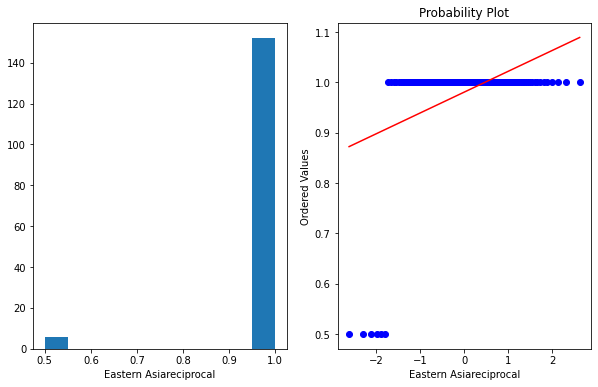

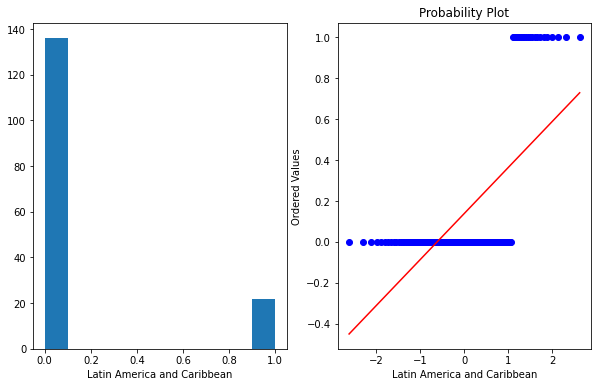

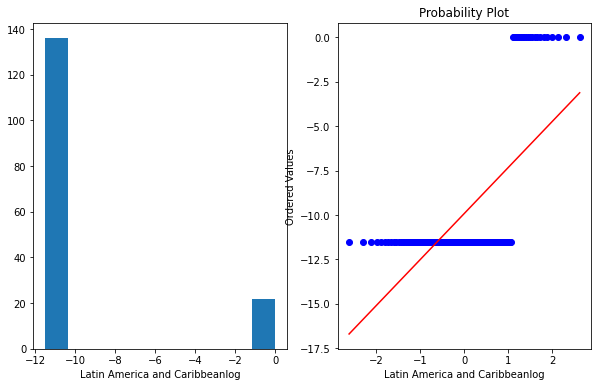

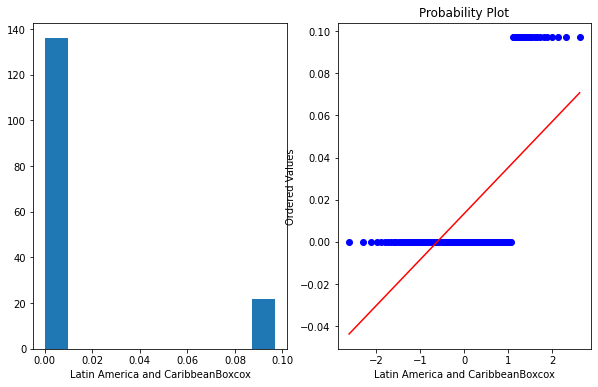

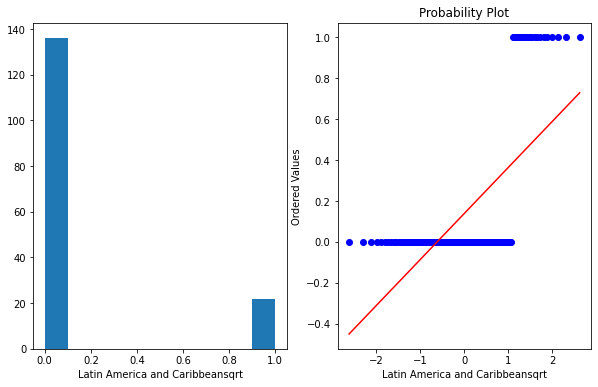

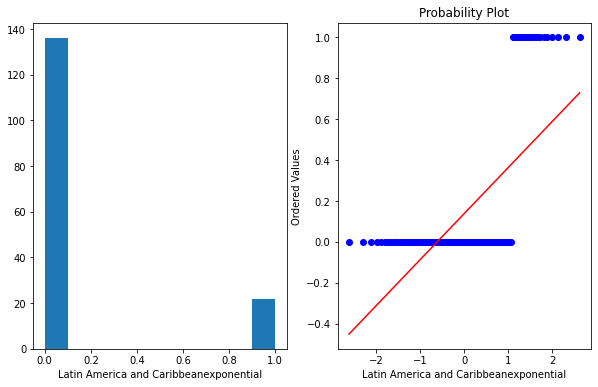

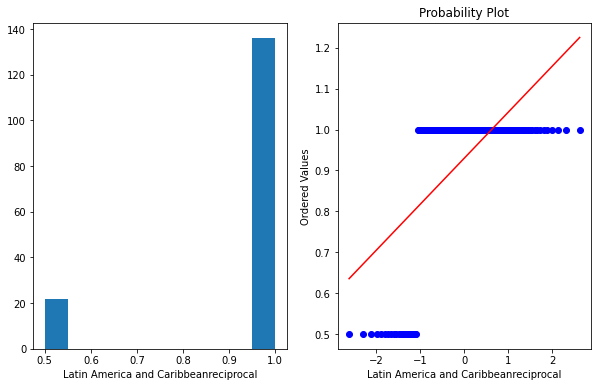

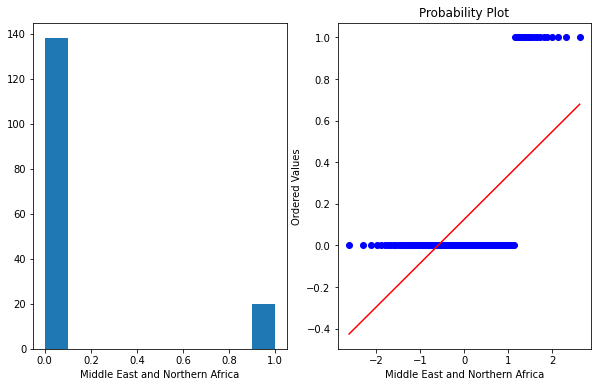

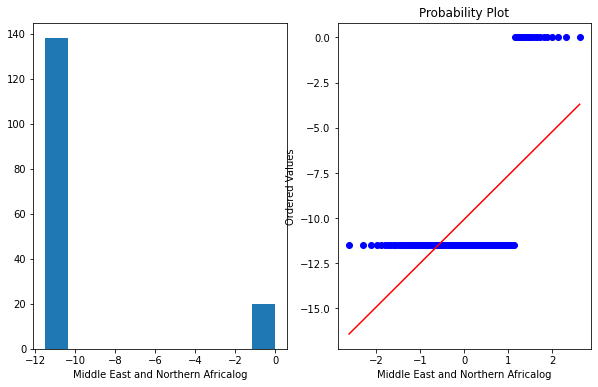

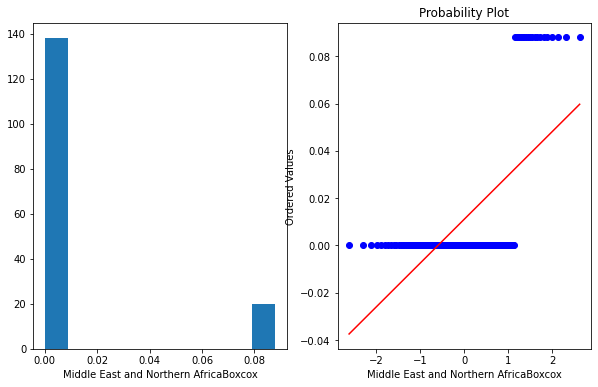

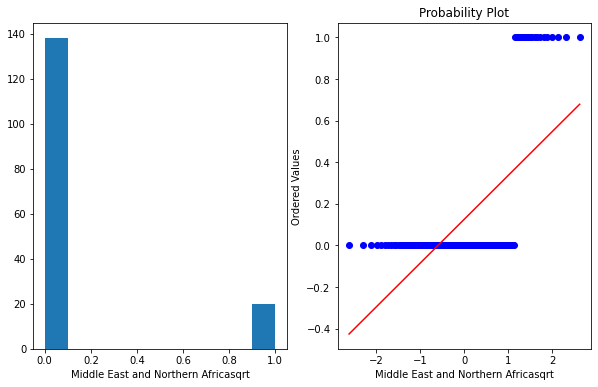

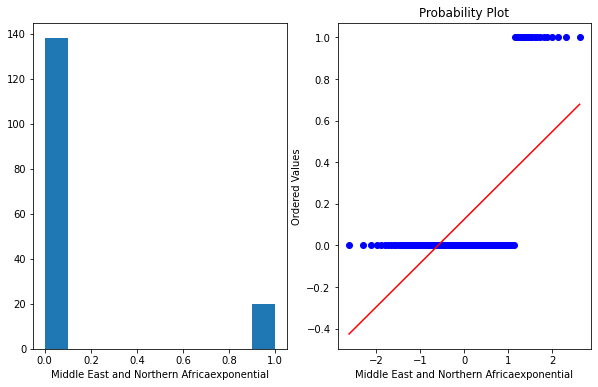

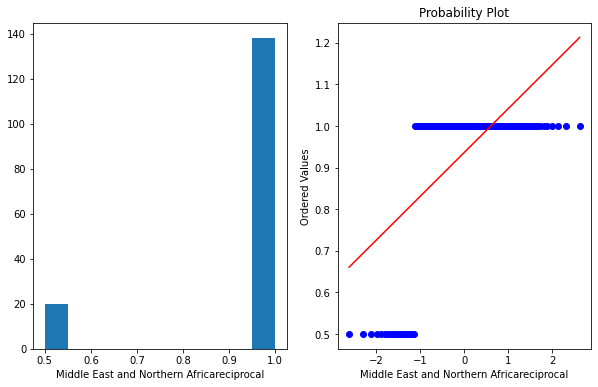

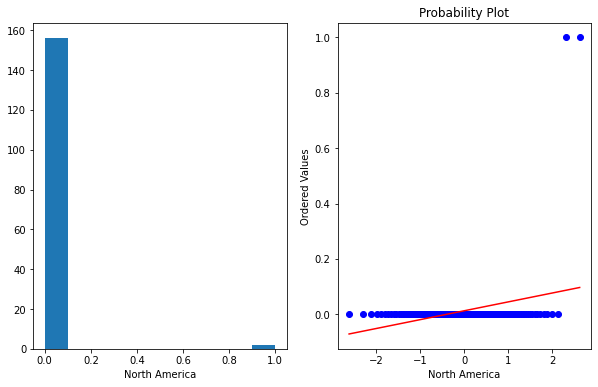

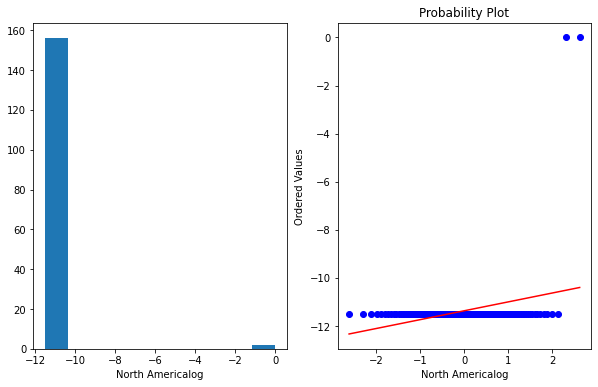

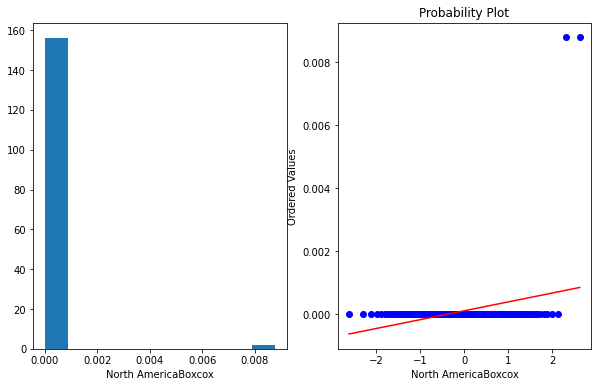

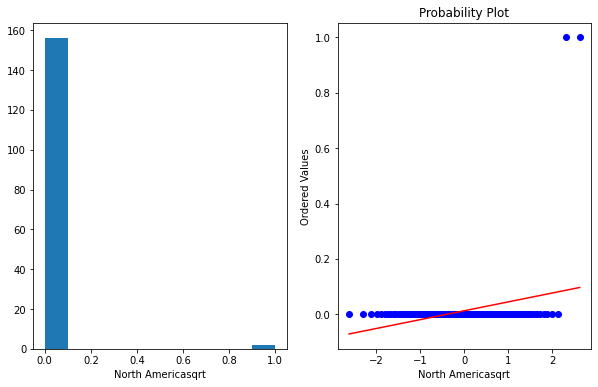

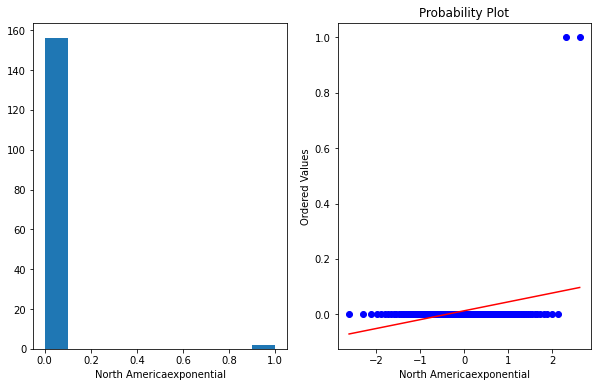

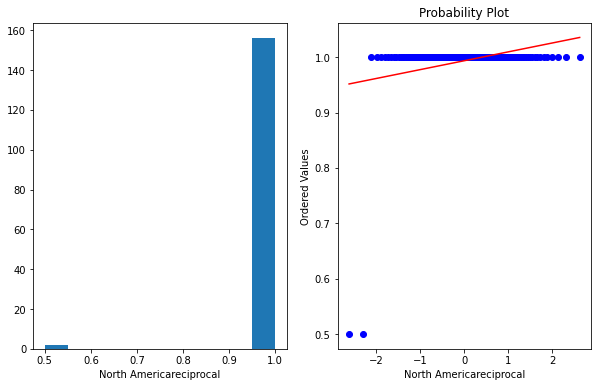

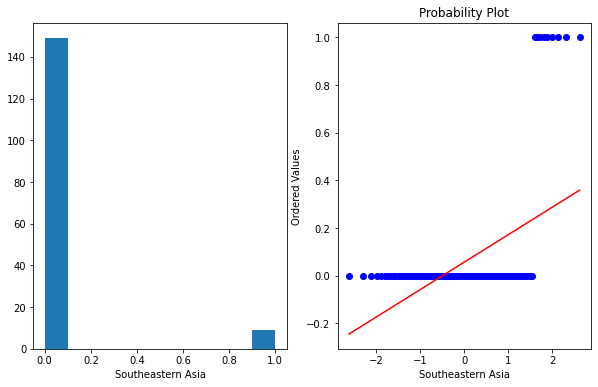

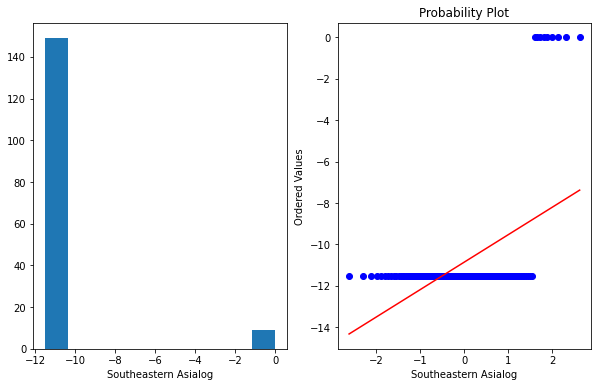

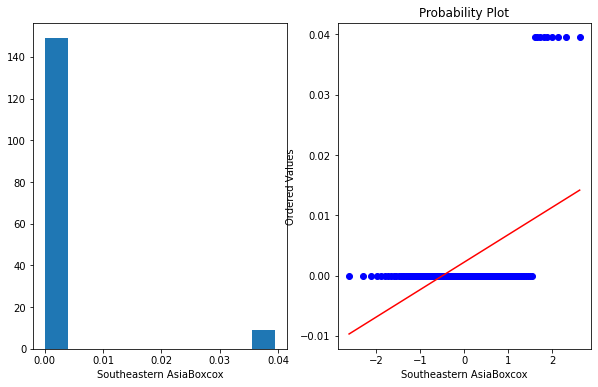

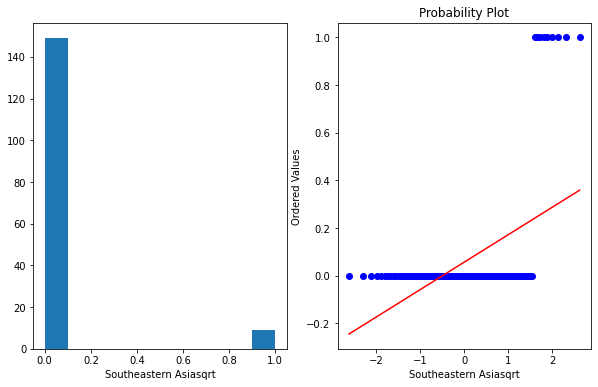

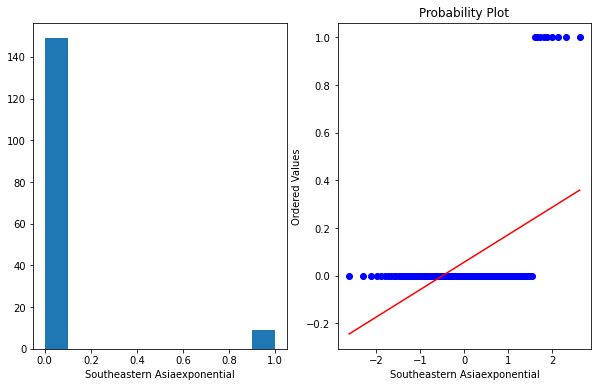

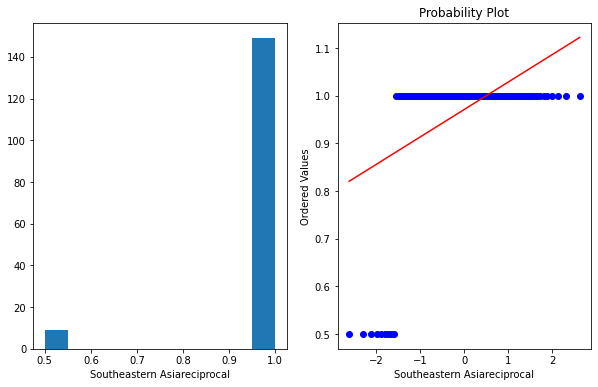

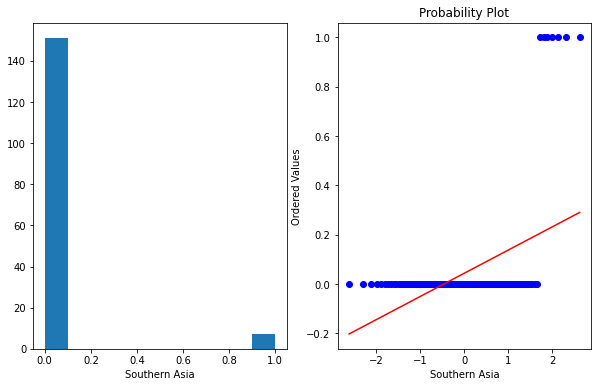

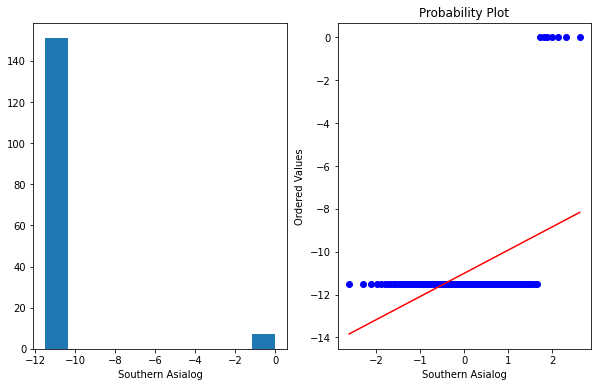

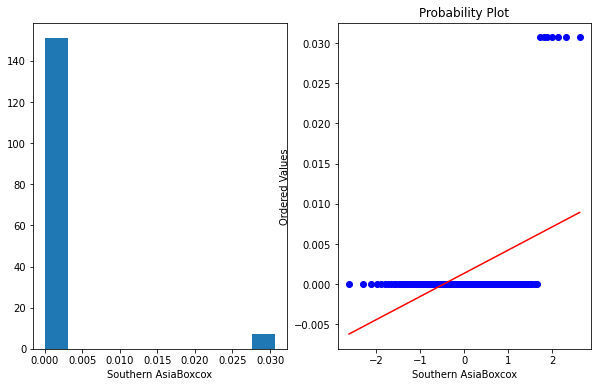

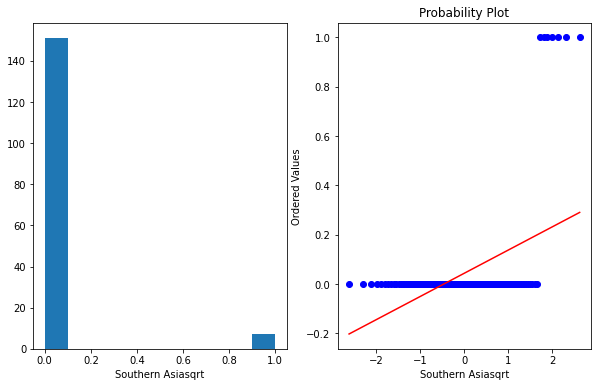

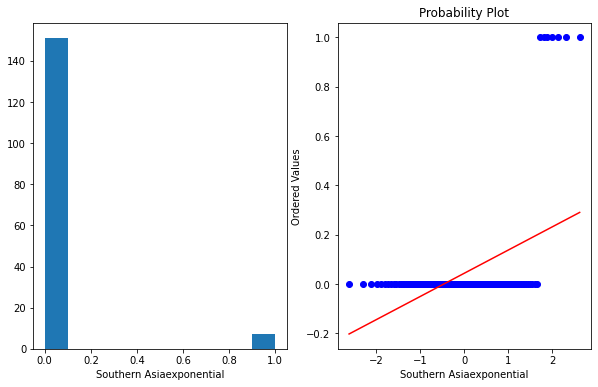

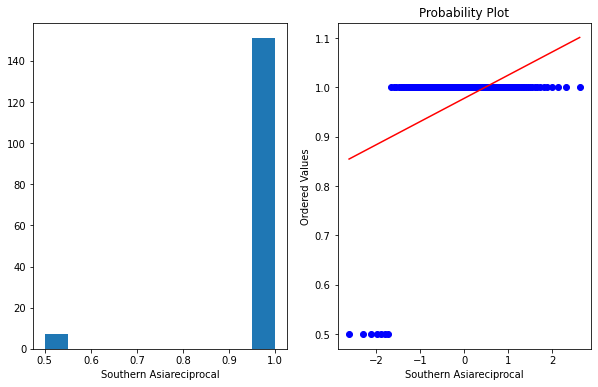

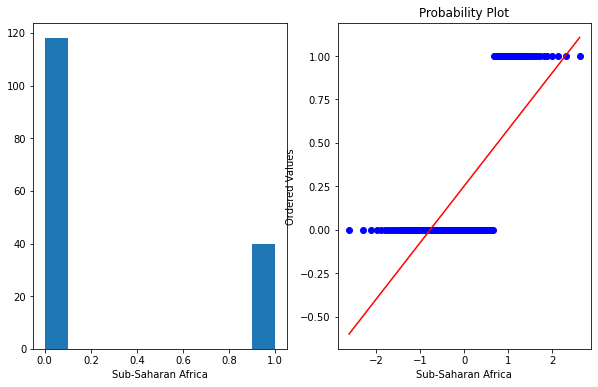

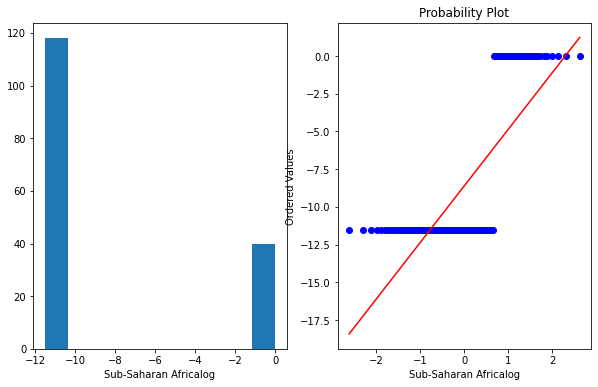

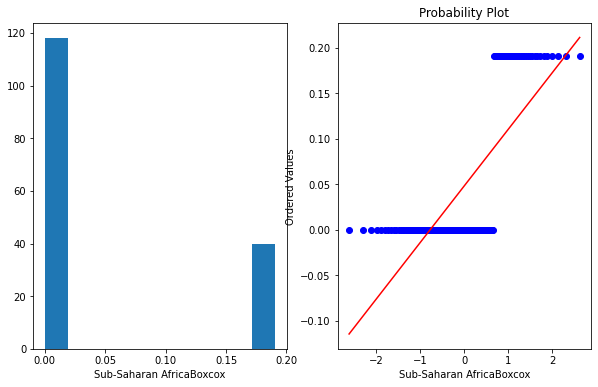

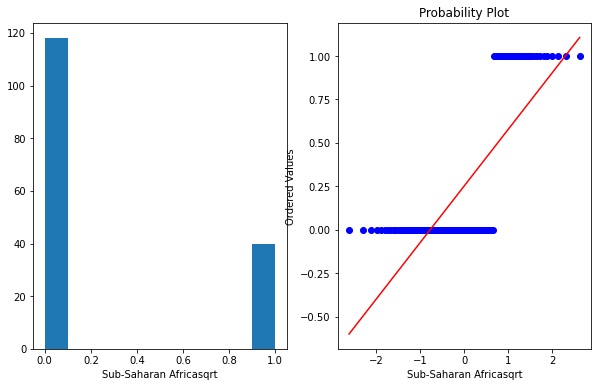

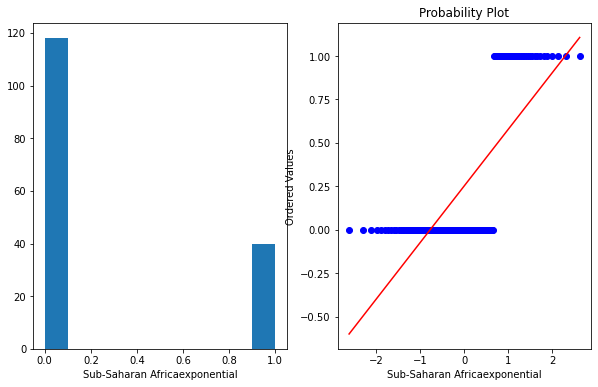

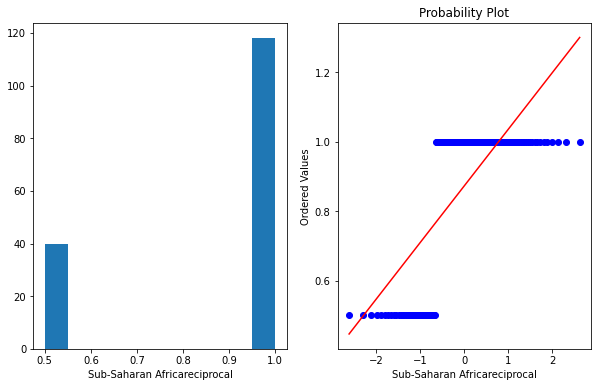

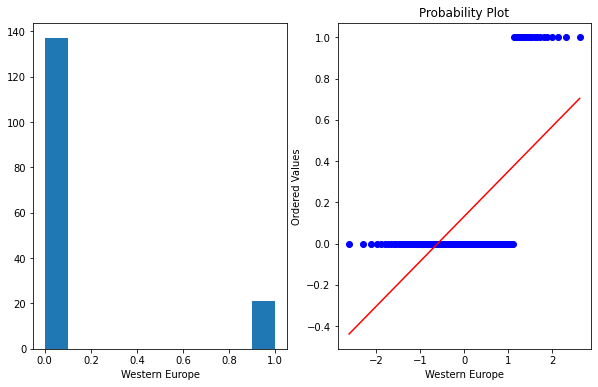

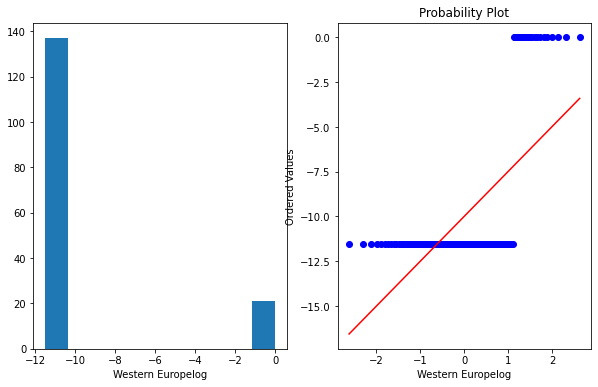

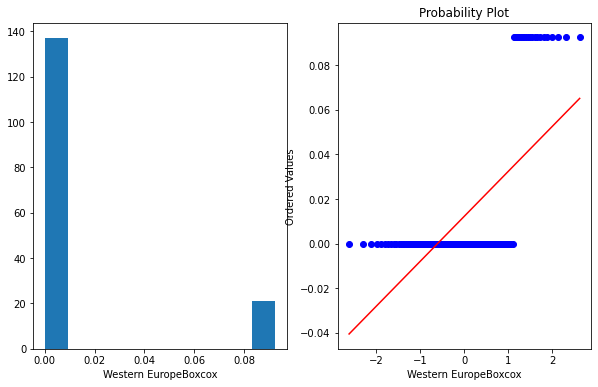

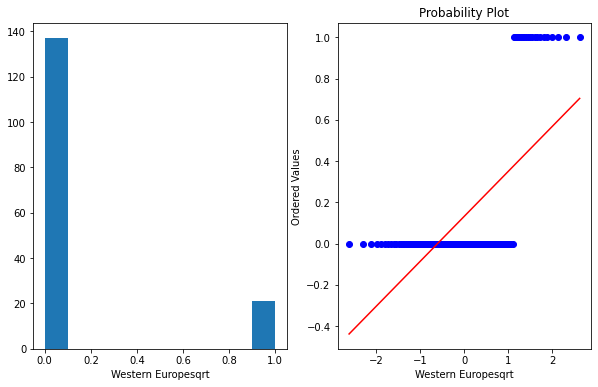

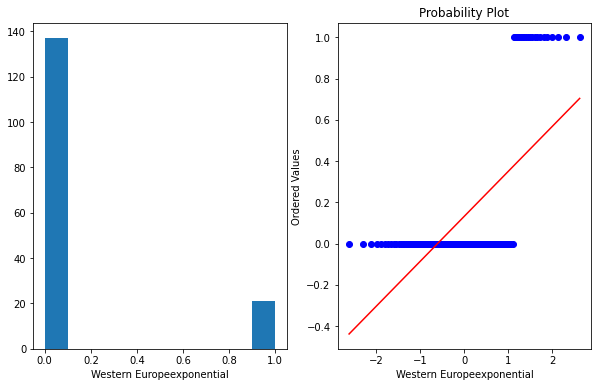

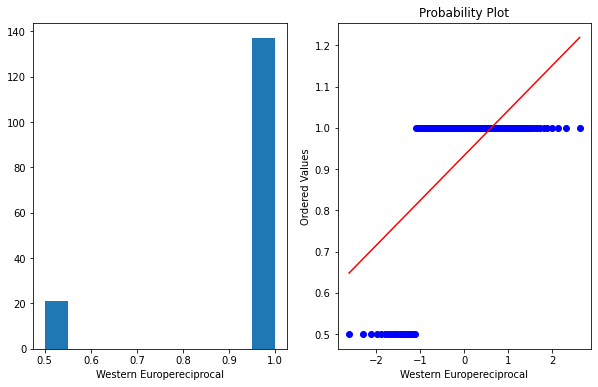

In [8]:
df1=pd.DataFrame()
for i in df.iloc[:,3:].columns:
    plt_data(df,i)
    df1[i+'log']=np.log(df[i]+0.00001)
    plt_data(df1,i+'log')
    df1[i+'Boxcox'],para=stat.boxcox(df[i]+1)
    plt_data(df1,i+'Boxcox')
    df1[i+'sqrt']=df[i]**(1/2)
    plt_data(df1,i+'sqrt')
    df1[i+'exponential']=df[i]**(1/1.2)
    plt_data(df1,i+'exponential')
    df1[i+'reciprocal']=1/(1+df[i])
    plt_data(df1,i+'reciprocal')

***Normilization action needed***

Happiness Score- No need to change.     
Standard Error- Boxcox    
Economy (GDP per Capita)- No need to change.      
Family- Boxcox    
Health (Life Expectancy)- Boxcox   
Freedom- No need to change.  
Trust (Government Corruption)- sqrt  
Generosity-Boxcox  
Dystopia Residual-Boxcox

In [ ]:
df.skew()

Happiness Rank                     0.000418
Happiness Score                    0.097769
Standard Error                     1.983439
Economy (GDP per Capita)          -0.317575
Family                            -1.006893
Health (Life Expectancy)          -0.705328
Freedom                           -0.413462
Trust (Government Corruption)      1.385463
Generosity                         1.001961
Dystopia Residual                 -0.238911
Australia and New Zealand          8.802321
Central and Eastern Europe         1.650669
Eastern Asia                       4.881004
Latin America and Caribbean        2.104155
Middle East and Northern Africa    2.267677
North America                      8.802321
Southeastern Asia                  3.859823
Southern Asia                      4.471763
Sub-Saharan Africa                 1.146245
Western Europe                     2.183443
dtype: float64

In [9]:
df['Standard Error']=df1['Standard ErrorBoxcox']         
df.Family=df1.FamilyBoxcox    
df['Health (Life Expectancy)']=df1['Health (Life Expectancy)Boxcox']    
df['Trust (Government Corruption)']=df1['Trust (Government Corruption)sqrt']  
df.Generosity=df1.GenerosityBoxcox  
df['Dystopia Residual']=df1['Dystopia ResidualBoxcox']

In [10]:
df.skew()

Happiness Rank                     0.000418
Happiness Score                    0.097769
Standard Error                    -0.020092
Economy (GDP per Capita)          -0.317575
Family                            -0.169651
Health (Life Expectancy)          -0.183181
Freedom                           -0.413462
Trust (Government Corruption)      0.507663
Generosity                         0.013320
Dystopia Residual                  0.022925
Australia and New Zealand          8.802321
Central and Eastern Europe         1.650669
Eastern Asia                       4.881004
Latin America and Caribbean        2.104155
Middle East and Northern Africa    2.267677
North America                      8.802321
Southeastern Asia                  3.859823
Southern Asia                      4.471763
Sub-Saharan Africa                 1.146245
Western Europe                     2.183443
dtype: float64

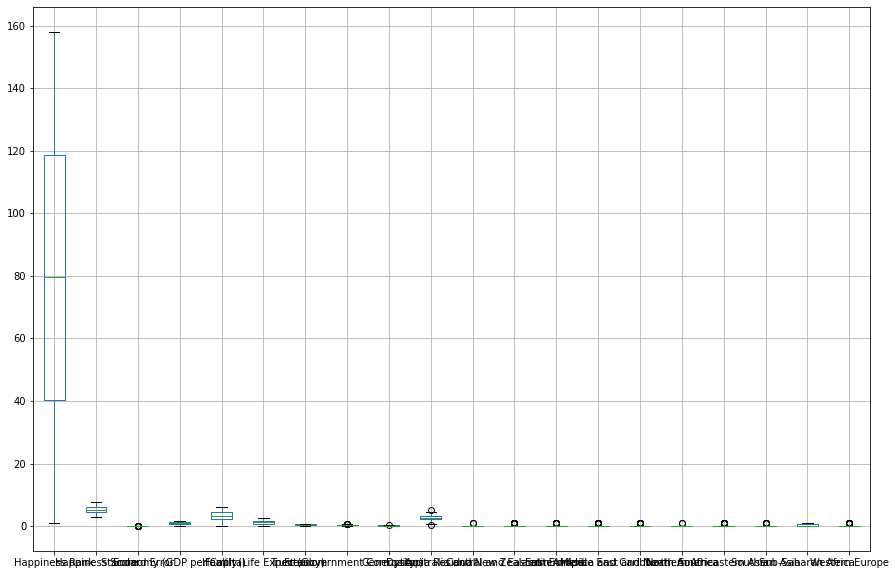

In [ ]:
fig, ax = plt.subplots(figsize=(15,  10))
df.boxplot(ax=ax)

In [11]:
x=df.iloc[:,4:]
y=df.iloc[:,3]

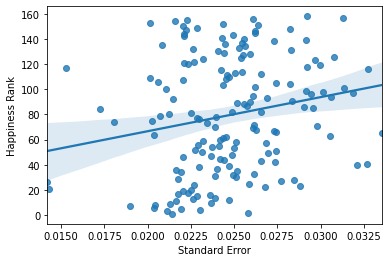

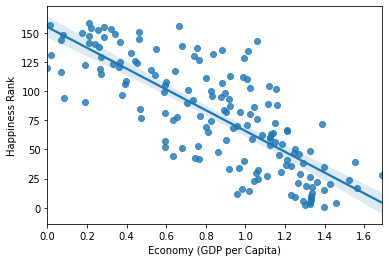

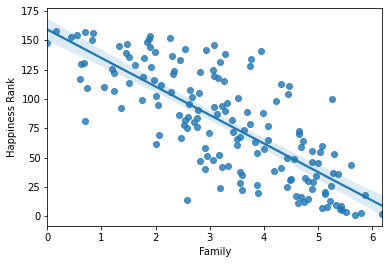

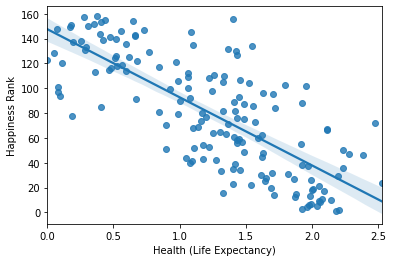

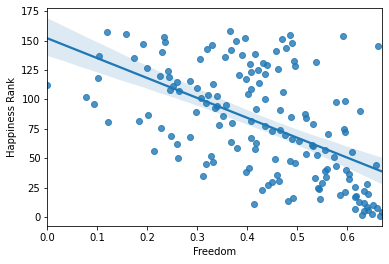

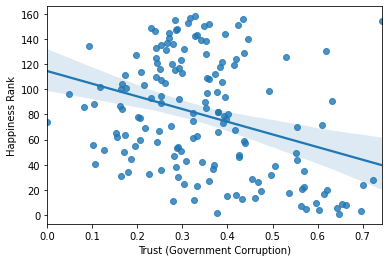

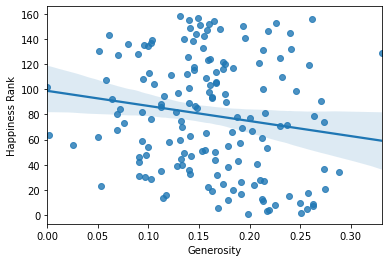

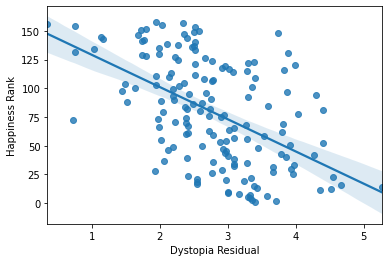

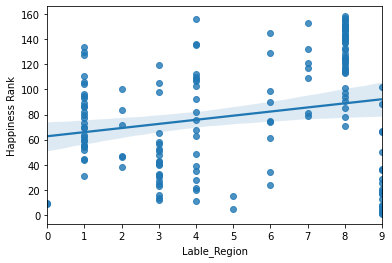

In [ ]:
for i in x.columns:
  sns.regplot(x=i,y='Happiness Rank',data=df)
  plt.show()

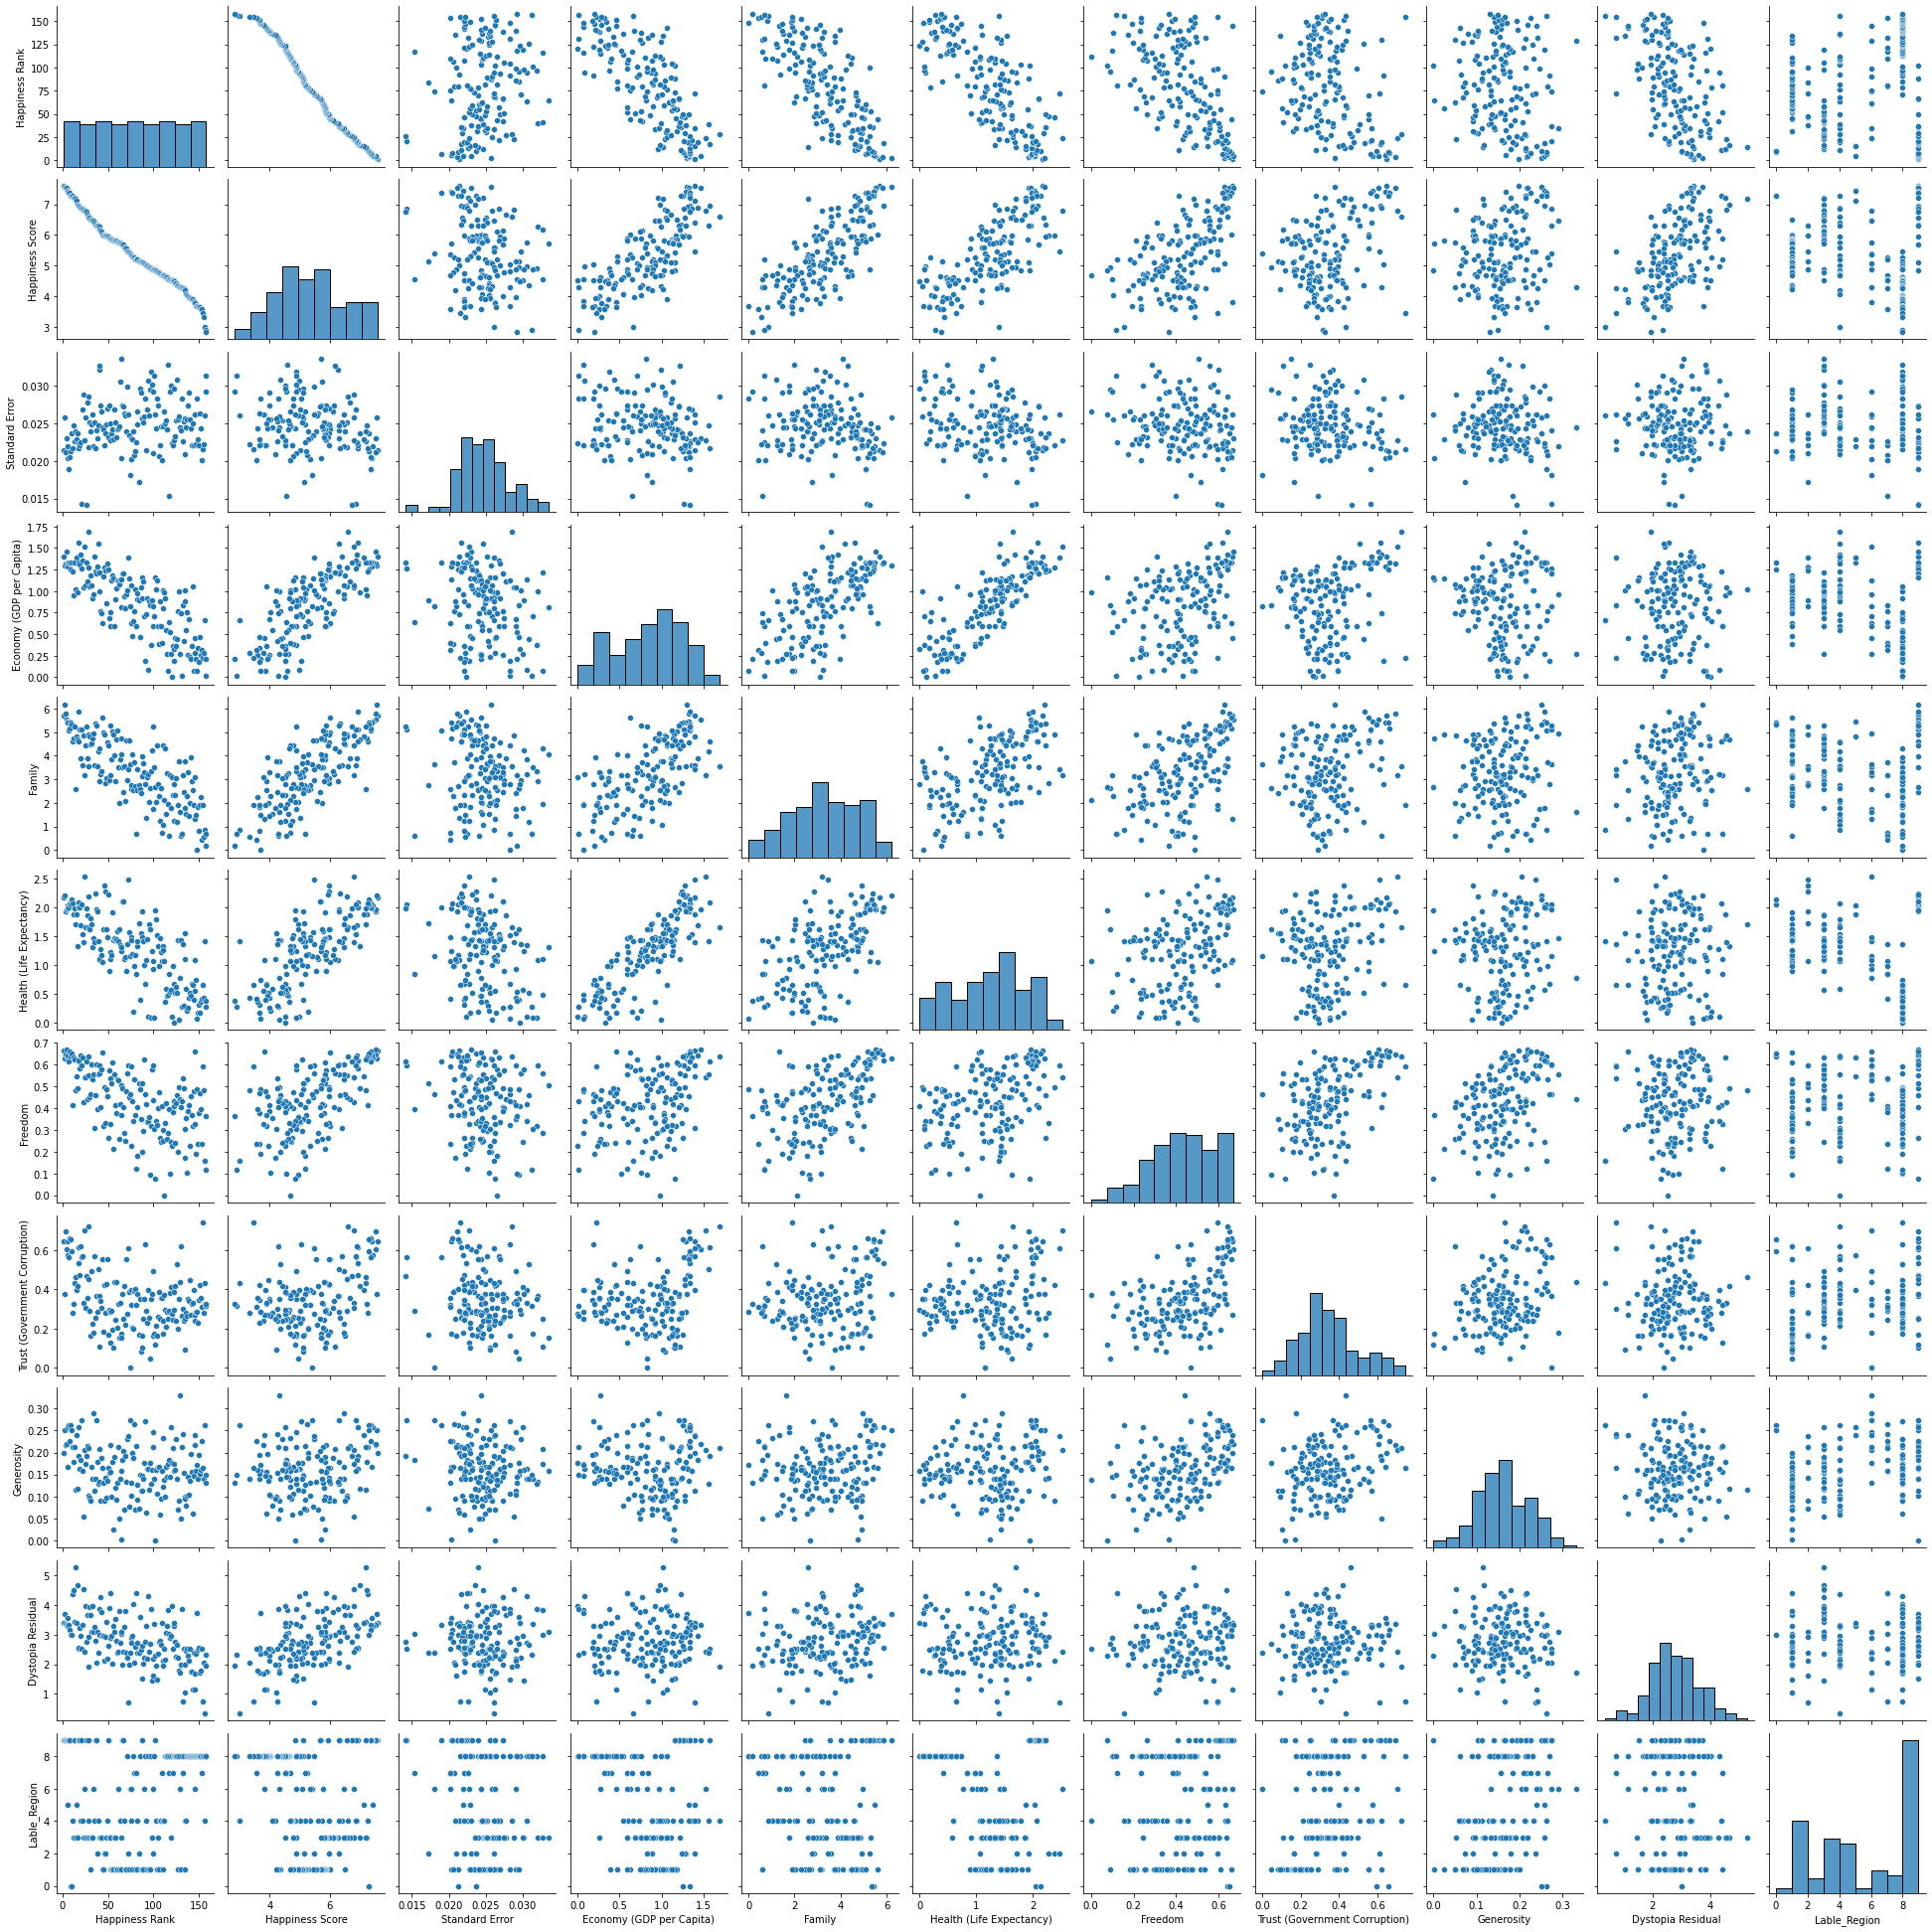

In [ ]:
sns.pairplot(df)

From Pair plot it is clear that feature are interrelated to each other or multicolinarity exists

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.preprocessing import StandardScaler as SS
x_scaler=SS().fit_transform(x)
vif=pd.DataFrame()
vif['vif']=[VIF(x_scaler,i) for i in range(x_scaler.shape[1])]
vif['feature']=x.columns


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [15]:
vif.sort_values(by='vif')

,vif,feature
7,1.289775,Dystopia Residual
0,1.588148,Standard Error
5,1.609041,Trust (Government Corruption)
6,1.793304,Generosity
4,2.236441,Freedom
2,2.734461,Family
1,5.411274,Economy (GDP per Capita)
3,7.156856,Health (Life Expectancy)
15,inf,Southern Asia
14,inf,Southeastern Asia


Economy and Health are highly correlated 

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fvalue_selector = SelectKBest(f_classif, k=2)

x_new = fvalue_selector.fit(x, y)
pd.DataFrame([x.columns,x_new.scores_]).T.sort_values(by=1)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


,0,1
12,Middle East and Northern Africa,0.217543
9,Central and Eastern Europe,0.297144
4,Freedom,0.904457
2,Family,5.57401
6,Generosity,6.44062
0,Standard Error,8.15927
7,Dystopia Residual,12.7746
1,Economy (GDP per Capita),62.3956
3,Health (Life Expectancy),103.619
5,Trust (Government Corruption),2.91998e+07


All the variables have **VIF** less than 5 and Economy (GDP per Capita is highly related to Happiness Score so There is no need to drop any column. 


Secondly, as there are only 158 rows in the dataset it is best to use  Leave One Out cross validation 

In [17]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
cv = LeaveOneOut()


model = LinearRegression()


scores = cross_val_score(model, x, y, scoring='neg_root_mean_squared_error',
                         cv=cv, n_jobs=-1)

scores.mean()

-0.0673143076075978

In [18]:
from sklearn.svm import LinearSVR
model1 = LinearSVR()


scores = cross_val_score(model1, x, y, scoring='neg_root_mean_squared_error',
                         cv=cv, n_jobs=-1)

scores.mean()

-0.06744023153490417

In [19]:
from sklearn.linear_model import Ridge

model2=Ridge()

scores = cross_val_score(model2, x, y, scoring='neg_root_mean_squared_error',
                         cv=cv, n_jobs=-1)

scores.mean()

-0.09555944888353525

In [20]:
from sklearn.linear_model import Lasso

model3=Lasso()

scores = cross_val_score(model3, x, y, scoring='neg_root_mean_squared_error',
                         cv=cv, n_jobs=-1)

scores.mean()

-0.8434516392612212

In [21]:
from sklearn.linear_model import HuberRegressor as HR

model4=HR()

scores = cross_val_score(model4, x, y, scoring='neg_root_mean_squared_error',
                         cv=cv, n_jobs=-1)

scores.mean()


-0.061922305001783286

Let's select top 2 regressor and do ***Hyperparameter tuning***.  


1-HuberRegressor    
2-Linear SVR   


In [ ]:
hr_params={'epsilon':[1,1.15,1.3],
           'max_iter':[50,100,125],
           'alpha':[1e-07,1e-06,1e-05]
           }

from sklearn.model_selection import GridSearchCV as GSCV


reg_hr=GSCV(HR(),hr_params,cv=LeaveOneOut(),scoring='neg_root_mean_squared_error')

hr_model=reg_hr.fit(x,y)

In [ ]:
hr_model.best_estimator_

HuberRegressor(alpha=1e-06, epsilon=1.15)

In [ ]:
hr_model.best_score_

-0.06142851295644795

In [ ]:
lsvr_params={'C':[1.45,1.6,1.75],
             
             'max_iter':[25000,27000,29000]
           }


reg_lsvr=GSCV(LinearSVR(),lsvr_params,cv=LeaveOneOut(),scoring='neg_root_mean_squared_error')


lsvr_model=reg_lsvr.fit(x,y)

In [ ]:
lsvr_model.best_estimator_

LinearSVR(C=1.6, max_iter=27000)

In [ ]:
lsvr_model.best_score_

-0.06250361004973698

In [ ]:
sec_model=LinearSVR(C=1.6, max_iter=27000)


HuberRegressor is the best Rergessor 

In [23]:
best_model= HR(alpha=1e-06, epsilon=1.15)

In [27]:
from sklearn.model_selection import train_test_split as TTS
x_train,x_test,y_train,y_test=TTS(x,y,test_size=0.1,random_state=102)

In [ ]:
best_reg=best_model.fit(x_train,y_train)
y_pred=best_reg.predict(x_test)

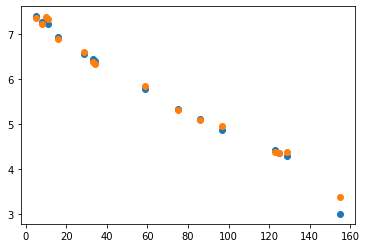

In [34]:
plt.scatter(x=y_test.index,y=y_test,cmap='red')
plt.scatter(x=y_test.index,y=y_pred,cmap='blue')

In [35]:
scores = cross_val_score(model4, x, y, scoring='neg_root_mean_squared_error',
                         cv=10, n_jobs=-1)

scores.mean()

-0.08940303205994496

In [36]:
scores

array([-0.08173633, -0.06398924, -0.05996979, -0.06171119, -0.09144384,
       -0.08996973, -0.06832317, -0.08088125, -0.06772548, -0.2282803 ])